In [1]:
import sync_wandb_run
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import utils as pu


# Filtering database

In [2]:
entity = "raphaelmaser"  # Your W&B username or team
project = "Improved-Interpretability-and-Concepts"  # Your W&B project name
df = sync_wandb_run.load_wandb_runs()
df.count()  # Display the number of runs loaded
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

val_accuracy = "Validation Accuracy"
grid_score = "PG Score"


In [3]:
interleaved_models_resnet = df[df['group'] == "bottleneck_position_resnet"]
interleaved_models_bcos = df[df['group'] == "bottleneck_position_bcos"]
interleaved_models = pd.concat([interleaved_models_resnet, interleaved_models_bcos])
interleaved_models = interleaved_models.query("config_freeze_pretrained_weights == True and config_insert_adapter_layers == True and config_remove_adapter_skip_connections == False")  # Filter runs by group
interleaved_models.reset_index(drop=True, inplace=True)  # Reset index after filtering
display(interleaved_models)  # Count the number of runs in this group
interleaved_models.head()
for name in interleaved_models["name"].unique(): print(name)  # Print each model name

id                                               name     state  \
0   erpno16m  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
1   yqn0r6p8  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
2   xcfdi7sn  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
3   ed4j3m70  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
4   qrpvnl7n  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
5   m71gbopy  B=1-pretrained-CE_B=2-adapter-layer_B=2-classi...  finished   
6   7ua8awxf  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   
7   ktbh7l8l  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   
8   la2e12r3  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   
9   2d1fwjl5  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   
10  y7kvcbl5  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   
11  j0h2j9wo  B=2-pretrained_B=1-adapter-layer_B=1-classifie...  finished   

          entity                                 project  \
0   raphaelmaser  Improved-Interpretability-and-Concepts   
1   raphaelmaser  Improved-Interpretability-and-Concepts   
2   raphaelmaser  Improved-Interpretability-and-Concepts   
3   raphaelmaser  Improved-Interpretability-and-Concepts   
4   raphaelmaser  Improved-Interpretability-and-Concepts   
5   raphaelmaser  Improved-Interpretability-and-Concepts   
6   raphaelmaser  Improved-Interpretability-and-Concepts   
7   raphaelmaser  Improved-Interpretability-and-Concepts   
8   raphaelmaser  Improved-Interpretability-and-Concepts   
9   raphaelmaser  Improved-Interpretability-and-Concepts   
10  raphaelmaser  Improved-Interpretability-and-Concepts   
11  raphaelmaser  Improved-Interpretability-and-Concepts   

              created_at  updated_at tags notes  \
0   2025-05-19T14:13:23Z         NaN  NaN   NaN   
1   2025-05-19T14:13:19Z         NaN  NaN   NaN   
2   2025-05-19T14:13:19Z         NaN  NaN   NaN   
3   2025-05-19T14:13:23Z         NaN  NaN   NaN   
4   2025-05-19T14:13:23Z         NaN  NaN   NaN   
5   2025-05-19T14:13:19Z         NaN  NaN   NaN   
6   2025-05-19T17:08:08Z         NaN  NaN   NaN   
7   2025-05-19T17:08:08Z         NaN  NaN   NaN   
8   2025-05-19T17:08:08Z         NaN  NaN   NaN   
9   2025-05-19T17:08:08Z         NaN  NaN   NaN   
10  2025-05-19T17:07:59Z         NaN  NaN   NaN   
11  2025-05-19T17:08:08Z         NaN  NaN   NaN   

                                                  url  \
0   https://wandb.ai/raphaelmaser/Improved-Interpr...   
1   https://wandb.ai/raphaelmaser/Improved-Interpr...   
2   https://wandb.ai/raphaelmaser/Improved-Interpr...   
3   https://wandb.ai/raphaelmaser/Improved-Interpr...   
4   https://wandb.ai/raphaelmaser/Improved-Interpr...   
5   https://wandb.ai/raphaelmaser/Improved-Interpr...   
6   https://wandb.ai/raphaelmaser/Improved-Interpr...   
7   https://wandb.ai/raphaelmaser/Improved-Interpr...   
8   https://wandb.ai/raphaelmaser/Improved-Interpr...   
9   https://wandb.ai/raphaelmaser/Improved-Interpr...   
10  https://wandb.ai/raphaelmaser/Improved-Interpr...   
11  https://wandb.ai/raphaelmaser/Improved-Interpr...   

                         group  job_type  sweep                   synced_at  \
0   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:15:03.479222   
1   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:15:00.623257   
2   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:14:58.822442   
3   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:15:02.542325   
4   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:15:01.613915   
5   bottleneck_position_resnet       NaN    NaN  2025-07-22T13:14:59.716814   
6     bottleneck_position_bcos       NaN    NaN  2025-07-22T13:15:08.162512   
7     bottleneck_position_bcos       NaN    NaN  2025-07-22T13:15:05.252586   
8     bottleneck_position_bcos       NaN    NaN  2025-07-22T13:15:07.183561   
9     bottleneck_position_bcos 

B=1-pretrained-CE_B=2-adapter-layer_B=2-classifier_frozen
B=2-pretrained_B=1-adapter-layer_B=1-classifier_frozen


In [4]:
# Method 1: Using .isin() - most common and readable
baseline_ids = ["f1bjsf4y", "3g5nirfa", "sh8y0tee"]  # Add your actual IDs
baseline_models = df[df['id'].isin(baseline_ids)]

# Method 3: Using query() method - good for complex conditions
# baseline_models = df.query("id == 'osmrd1gv' or id == 'another_id' or id == 'third_id'")

print(f"Found {len(baseline_models)} baseline models")
baseline_models

Found 3 baseline models


id                          name     state        entity  \
65   sh8y0tee     EfficientBcosResNet50_B=1  finished  raphaelmaser   
338  3g5nirfa  EfficientBcosResNet50_B=1_CE  finished  raphaelmaser   
610  f1bjsf4y         EfficientBcosResNet50  finished  raphaelmaser   

                                    project            created_at  updated_at  \
65   Improved-Interpretability-and-Concepts  2025-05-18T07:44:08Z         NaN   
338  Improved-Interpretability-and-Concepts  2025-05-18T07:44:08Z         NaN   
610  Improved-Interpretability-and-Concepts  2025-06-24T13:36:04Z         NaN   

         tags notes                                                url  \
65   baseline   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
338  baseline   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
610       NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   

                         group  job_type  sweep                   synced_at  \
65   6th iteration feasibility       NaN    NaN  2025-07-22T13:14:57.939351   
338  6th iteration feasibility       NaN    NaN  2025-07-22T13:14:56.002146   
610  6th iteration feasibility       NaN    NaN  2025-07-22T13:16:35.127075   

     final_trainer/global_step  final_MulticlassAccuracy_train  \
65                    100999.0                        0.896163   
338                   100999.0                        0.906745   
610                   100999.0                        0.911781   

     final_high_confidence_samples  \
65                             NaN   
338                            NaN   
610                            NaN   

     final_MulticlassAccuracy_val/dataloader_idx_0  \
65                                             NaN   
338                                            NaN   
610                                            NaN   

     final_val_contribution_score/dataloader_idx_0  final_train_time  \
65                                             NaN               NaN   
338                                            NaN               NaN   
610                                            NaN        167.011856   

     final_val_pg_score/dataloader_idx_1  final_train_loss  \
65                                   NaN          0.034432   
338                                  NaN          0.369762   
610                                  NaN          0.033888   

     final_epoch_total_time  final_val_loss/dataloader_idx_0  final_epoch  \
65                      NaN                              NaN         99.0   
338                     NaN                              NaN         99.0   
610              167.012573                              NaN         99.0   

     config_b  config_lr config_loss  config_seed   config_tags  \
65        1.0      0.001  UniformBCE         42.0  ['baseline']   
338       1.0      0.001          CE         42.0  ['baseline']   
610       2.0      0.001  UniformBCE         42.0           NaN   

                  config_group             config_model  config_epochs  \
65   6th iteration feasibility  BcosResNet50_bottleneck            100   
338  6th iteration feasibility  BcosResNet50_bottleneck            100   
610  6th iteration feasibility  BcosResNet50_bottleneck            100   

    config_adapter  config_compile config_dataset config_act_layer  \
65             NaN            True   TinyImagenet              NaN   
338            NaN            True   TinyImagenet              NaN   
610            NaN            True   TinyImagenet              NaN   

     config_b_adapter                                   config_data_path  \
65                NaN                                                NaN   
338               NaN                                                NaN   
610               2.0  /home/rmaser/rmaser_improved_interpretability_...   

    config_precision  config_batch_size config_cache_data  \
65        bf16-mixed                256              True   
338       bf16-mixed           

In [5]:
replace_dict = {"name": 
                  {
                        "EfficientBcosResNet50_B=1": "Bcos B=1", 
                        "EfficientBcosResNet50": "Bcos B=2", 
                        "EfficientBcosResNet50_B=1_CE": "Bcos B=1 CE", 
                        "B=1-pretrained-CE_B=2-adapter-layer_B=2-classifier_frozen": "Interleaved B=1 Model B=2 Adapters",
                        "B=2-pretrained_B=1-adapter-layer_B=1-classifier_frozen": "Interleaved B=2 Model B=1 Adapters"
                   }
                }
interleaved_models.replace(replace_dict, inplace=True)
baseline_models.replace(replace_dict, inplace=True)
all_runs = pd.concat([interleaved_models, baseline_models])

interleaved_models = pu.rename(interleaved_models)
interleaved_models = pu.rename_adapter_position(interleaved_models)
baseline_models = pu.rename(baseline_models)
baseline_models = pu.rename_adapter_position(baseline_models)


/tmp/ipykernel_2691441/2353843402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_models.replace(replace_dict, inplace=True)


# Plots

## Ablation position

In [6]:
ablation_b2 = interleaved_models.query("config_b == 2").sort_values(by="Adapter Position", ascending=False)
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=ablation_b2,
    y="Adapter Position",
    x=val_accuracy,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()

In [19]:
ablation_b2 = interleaved_models.query("config_b == 2").sort_values(by="Adapter Position", ascending=False)
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=ablation_b2,
    y="Adapter Position",
    x=grid_score,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()

## Summary plot

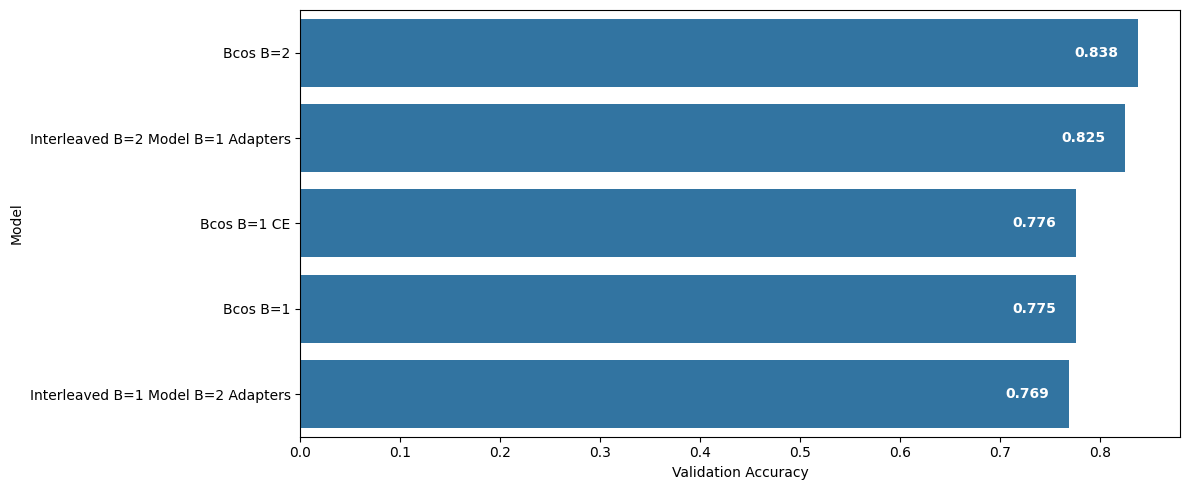

In [16]:

summary_plot = interleaved_models[interleaved_models['Adapter Position'] == '[0, 1, 1, 1, 1]']
summary_plot = pd.concat([summary_plot, baseline_models])
summary_plot = summary_plot.sort_values(by=val_accuracy, ascending=False)
# Option 2: Horizontal bar plot (often better for long names)
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=summary_plot,
    x=val_accuracy,
    y="Model"
)

pu.add_val_to_plot(ax)

plt.tight_layout()
plt.show()

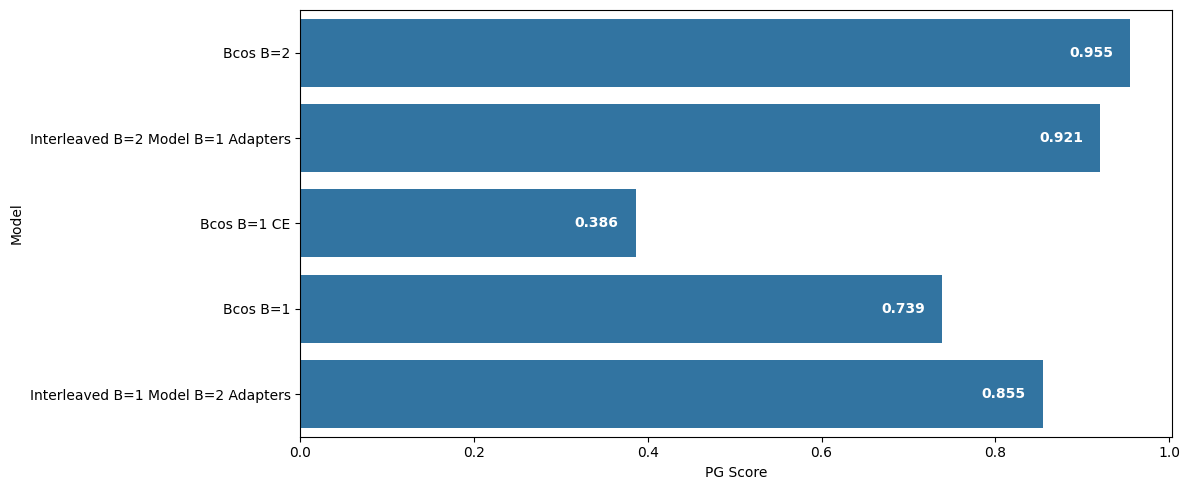

In [15]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=summary_plot,
    x=grid_score,
    y="Model"
)

pu.add_val_to_plot(ax)

plt.tight_layout()
plt.show()

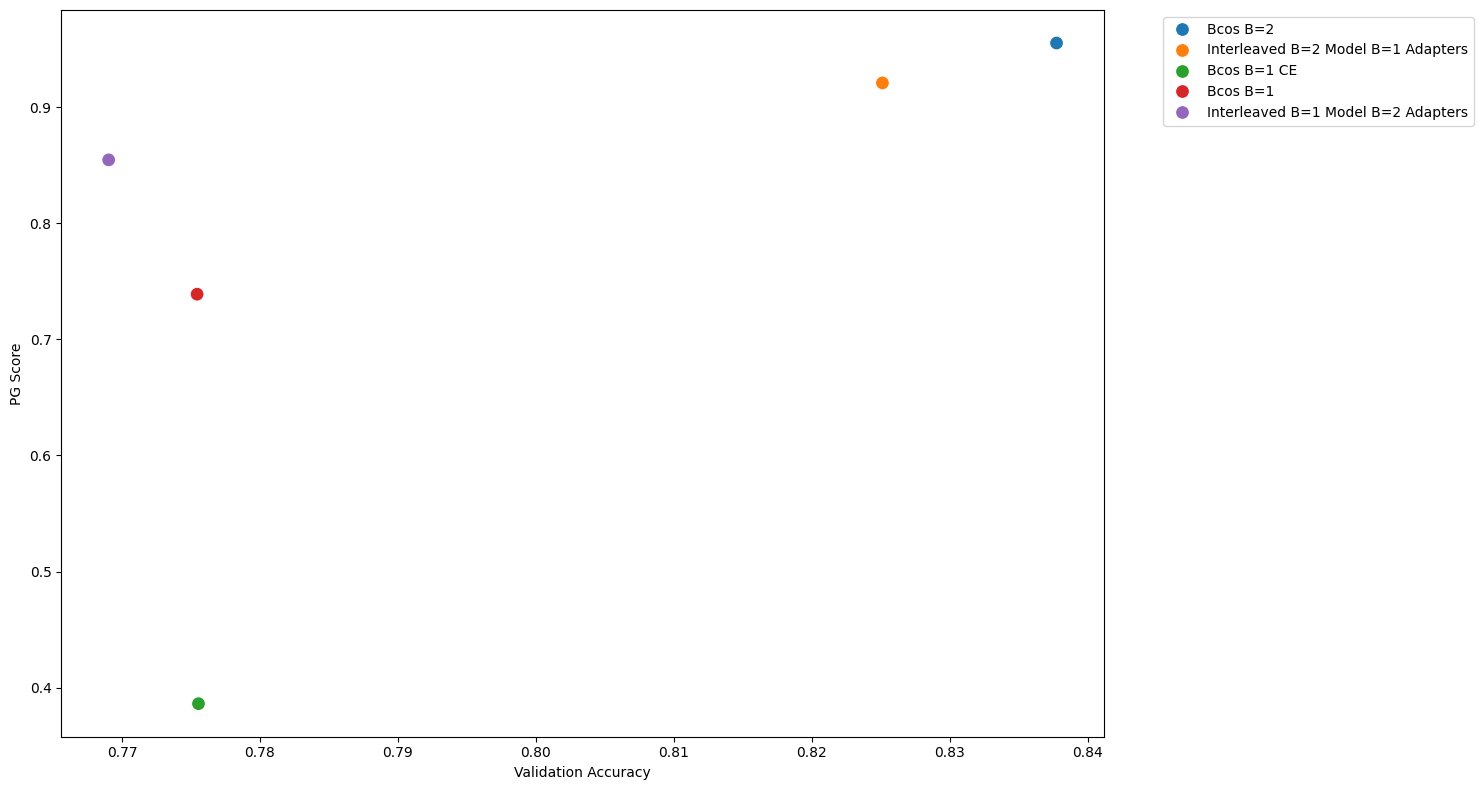

In [17]:
plt.figure(figsize=(15, 8))
ax = sns.scatterplot(
    data=summary_plot,
    x=val_accuracy,
    y=grid_score,
    hue="Model",  # Color points by name
    s=100  # Make points larger
)

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()